In [1]:
# -*- coding: utf-8 -*-
# Tensorflow 2.x

import pandas as pd
import numpy as np

In [2]:
def gen_sin(x, T=100):
    return np.sin(2.0*np.pi * x / T)

In [3]:
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return gen_sin(x) + noise

In [4]:
def make_dataset(raw_data, n_prev=100, maxlen=25):
    data, target = [], []
    
    for i in range(len(raw_data) - maxlen):
        data.append(raw_data[i : i + maxlen])
        target.append(raw_data[i + maxlen])
        
    reshaped_data = np.array(data).reshape(len(data), maxlen, 1)
    reshaped_target = np.array(target).reshape(len(target), 1)
    
    return reshaped_data, reshaped_target

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

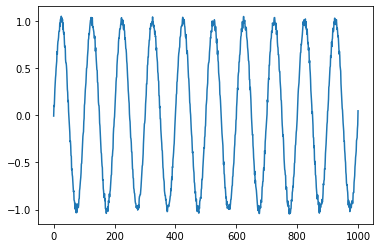

In [6]:
function = toy_problem(T=500)

plt.plot(function)

In [7]:
data, label = make_dataset(function, maxlen=25)
print(data.shape)

(976, 25, 1)


In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [9]:
length_of_sequence = data.shape[1]
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation('linear'))
optimizer = Adam(lr=1e-3)
model.compile(loss="mean_squared_error", optimizer=optimizer)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5)
model.fit(data, label, batch_size=100, epochs=200, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/200
9/9 [==============================] - 3s 166ms/step - loss: 0.2942 - val_loss: 0.0374
Epoch 2/200
9/9 [==============================] - 1s 73ms/step - loss: 0.0217 - val_loss: 0.0033
Epoch 3/200
9/9 [==============================] - 1s 71ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 4/200
9/9 [==============================] - 1s 69ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/200
9/9 [==============================] - 1s 67ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 6/200
9/9 [==============================] - 1s 68ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/200
9/9 [==============================] - 1s 69ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/200
9/9 [==============================] - 1s 77ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/200
9/9 [==============================] - 1s 68ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/200
9/9 [==============================] - 1s 68ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 11/200
9/9 [

In [10]:
predicted = model.predict(data)

future_test = data[-1].T
time_length = future_test.shape[1]
future_result = np.empty((0))

In [11]:
future_pointsize = 1000
for step in range(future_pointsize):
    test_data= np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)
    
    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)
    
    future_result = np.append(future_result, batch_predict)

In [12]:
import seaborn as sns

<AxesSubplot:>

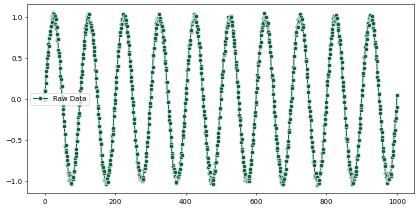

In [13]:
fig = plt.figure(figsize=(10,5),dpi=50)
sns.lineplot(
    color="#086039",
    data=function,
    label="Raw Data",
    marker="o"
)

<AxesSubplot:>

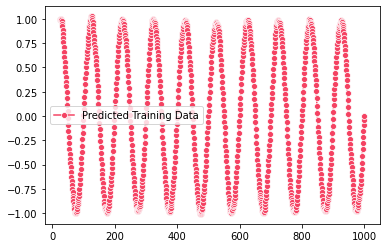

In [14]:
sns.lineplot(
    color="#f44262",
    x=np.arange(25, len(predicted)+25),
    y=predicted.reshape(-1),
    label="Predicted Training Data",
    marker="o"
)

<AxesSubplot:>

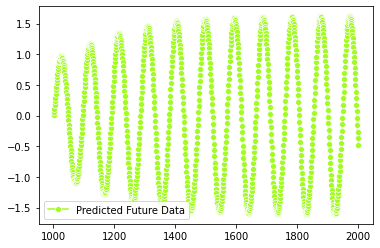

In [15]:
sns.lineplot(
    color="#a2fc23",
    y= future_result.reshape(-1),
    x = np.arange(0+len(function), len(future_result)+len(function)),
    label="Predicted Future Data",
    marker="o"
)

<AxesSubplot:>

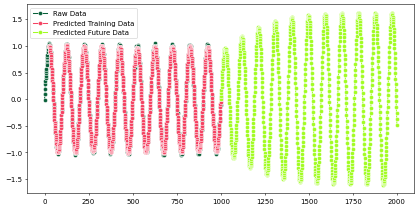

In [16]:
fig = plt.figure(figsize=(10,5),dpi=50)
sns.lineplot(
    color="#086039",
    data=function,
    label="Raw Data",
    marker="o"
)

sns.lineplot(
    color="#f44262",
    x=np.arange(25, len(predicted)+25),
    y=predicted.reshape(-1),
    label="Predicted Training Data",
    marker="o"
)

sns.lineplot(
    color="#a2fc23",
    y= future_result.reshape(-1),
    x = np.arange(0+len(function), len(future_result)+len(function)),
    label="Predicted Future Data",
    marker="o"
)